In [1]:
import geopandas as gpd
import pandas as pd
import seaborn
import folium
import numpy as np
import contextily as cx
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
rail = gpd.read_file('rail.geojson')

<AxesSubplot: >

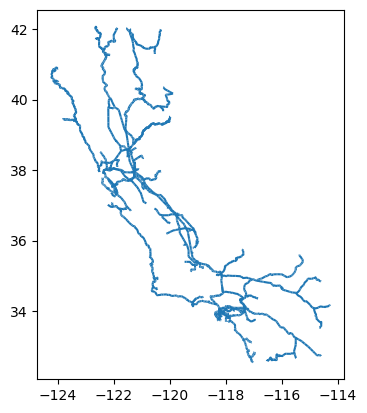

In [3]:
rail.plot()

In [4]:
rail.head(10)

OBJECTID  BEGIN_MP  END_MP ROW_OWNER FREIGHT_OP        SUBDIVISIO  \
0         1       4.1     7.9      ACTA    UP,BNSF  Alameda Corridor   
1         2      15.5    16.1      ACTA    UP,BNSF  Alameda Corridor   
2         3      14.8    15.5      ACTA    UP,BNSF  Alameda Corridor   
3         4      14.4    14.8      ACTA    UP,BNSF  Alameda Corridor   
4         5      13.4    14.4      ACTA    UP,BNSF  Alameda Corridor   
5         6      12.8    13.4      ACTA    UP,BNSF  Alameda Corridor   
6         7      12.1    12.8      ACTA    UP,BNSF  Alameda Corridor   
7         8      11.7    12.1      ACTA    UP,BNSF  Alameda Corridor   
8         9      10.6    11.7      ACTA    UP,BNSF  Alameda Corridor   
9        10       7.9    10.6      ACTA    UP,BNSF  Alameda Corridor   

  SHRTLN_NAM SHRTLN_COD PASS_OP PASS_NETWO  ... TRK_CLSS PASS_SPEED FRT_SPEED  \
0                                           ...        4          0        40   
1                                           ...        3          0        25   
2                                           ...        4          0        40   
3                                           ...        4          0        40   
4                                           ...        4          0        40   
5                                           ...        4          0        40   
6                                           ...        4          0        40   
7                                           ...        4          0        40   
8                                           ...        4          0        40   
9                                           ...        4          0        40   

  FRT_DNS NUM_TRACK STRACNET     CR63   SHAPE_LENG  SHAPE_Length  \
0       6         3        C  3MT,CTC  6187.935985      0.056088   
1       6         3        C  3MT,CTC   706.057975      0.006488   
2       6         3        C  3MT,CTC  1204.033226      0.011051   
3       6         3        C  3MT,CTC   589.531070      0.005414   
4       6         3        C  3MT,CTC  1033.658154      0.009554   
5       6         3        C  3MT,CTC   737.078418      0.006766   
6       6         3        C  3MT,CTC  1330.846531      0.012232   
7       6         3        C  3MT,CTC  1003.126586      0.009139   
8       6         3        C  3MT,CTC  1672.353055      0.015187   
9       6         3        C  3MT,CTC  4323.825797      0.039133   

                                            geometry  
0  MULTILINESTRING ((-118.23308 33.96746, -118.23...  
1  MULTILINESTRING ((-118.23542 33.80803, -118.23...  
2  MULTILINESTRING ((-118.23167 33.81843, -118.23...  
3  MULTILINESTRING ((-118.22981 33.82351, -118.23...  
4  MULTILINESTRING ((-118.22655 33.83225, -118.22...  
5  MULTILINESTRING ((-118.22425 33.83861, -118.22...  
6  MULTILINESTRING ((-118.21995 33.85006, -118.22...  
7  MULTILINESTRING ((-118.21772 33.85888, -118.21...  
8  MULTILINESTRING ((-118.21662 33.87371, -118.21...  
9  MULTILINESTRING ((-118.22277 33.91235, -118.22...  

[10 rows x 26 columns]

In [5]:
pd.set_option('display.max_columns', None)
rail.sample(20)

OBJECTID  BEGIN_MP  END_MP ROW_OWNER    FREIGHT_OP  \
1748      1749     380.7   381.3        UP       UP,BNSF   
1652      1653      67.5    75.0        UP  UP,BNSF,CFNR   
1917      1918     149.4   152.6        UP            UP   
693        694       3.9     4.3       SMV           SMV   
724        725      13.6    14.2       CCT           CCT   
691        692       4.3     4.8       SMV           SMV   
1181      1182       0.9     1.6        UP            UP   
606        607     432.9   437.9     SCRRA            UP   
2310      2311     646.1   647.8        UP            UP   
53          54       0.0     0.8      BNSF       BNSF,UP   
1246      1247     191.8   196.3        UP            UP   
2387      2388     336.4   345.2        UP            UP   
1702      1703     340.6   341.8        UP       UP,BNSF   
1752      1753     325.0   328.1        UP       UP,BNSF   
1944      1945     107.8   113.5        UP       UP,BNSF   
2278      2279       5.9     7.1     PCJPB      PCJPB,UP   
8            9      10.6    11.7      ACTA       UP,BNSF   
2402      2403     255.6   257.0      NCRA                 
1277      1278     271.8   273.0        UP            UP   
1265      1266     247.9   249.8        UP            UP   

                       SUBDIVISIO                   SHRTLN_NAM SHRTLN_COD  \
1748                       Mojave                                           
1652                     Martinez                                           
1917            Roseville-Track 2                                           
693   Main Line-Betteravia Branch           Santa Maria Valley        SMV   
724         Central Valley Branch  Central California Traction        CCT   
691   Main Line-Betteravia Branch           Santa Maria Valley        SMV   
1181      Benicia Industrial Lead                                           
606                       Ventura                                           
2310                         Yuma                                           
53                          Cajon                                           
1246                         Cima                                           
2387     Flanigan Industrial Lead                                           
1702                       Mojave                                           
1752                       Mojave                                           
1944                   Sacramento                                           
2278                    Peninsula                                           
8                Alameda Corridor                                           
2402                    Main Line         Northwestern Pacific        NWP   
1277                         Cima                                           
1265                         Cima                                           

     PASS_OP                                         PASS_NETWO      COMM_OP  \
1748                                                                           
1652  Amtrak  California Zephyr,Capitol Corridor,Coast Starl...                
1917  Amtrak                                  California Zephyr                
693                                                                            
724                                                                            
691                                                                            
1181                                                                           
606   Amtrak                  Coast Starlight,Pacific Surfliner    Metrolink   
2310  Amtrak                                     Sunset Limited                
53    Amtrak                                    Southwest Chief                
1246                                                                           
2387                                                                           
1702                                                                           
1752   

In [6]:
rail.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['OBJECTID', 'BEGIN_MP', 'END_MP', 'ROW_OWNER', 'FREIGHT_OP',
       'SUBDIVISIO', 'SHRTLN_NAM', 'SHRTLN_COD', 'PASS_OP', 'PASS_NETWO',
       'COMM_OP', 'COMM_NETWO', 'RECR_OP', 'RECR_NETWO', 'STATUS', 'RR_CLSS',
       'TRK_CLSS', 'PASS_SPEED', 'FRT_SPEED', 'FRT_DNS', 'NUM_TRACK',
       'STRACNET', 'CR63', 'SHAPE_LENG', 'SHAPE_Length', 'geometry'],
      dtype='object')>

In [7]:
railsub = rail[['FREIGHT_OP',
       'SUBDIVISIO', 'SHAPE_LENG', 'SHAPE_Length', 'geometry', 'STATUS']]

In [8]:
railsub.shape

(2436, 6)

<AxesSubplot: >

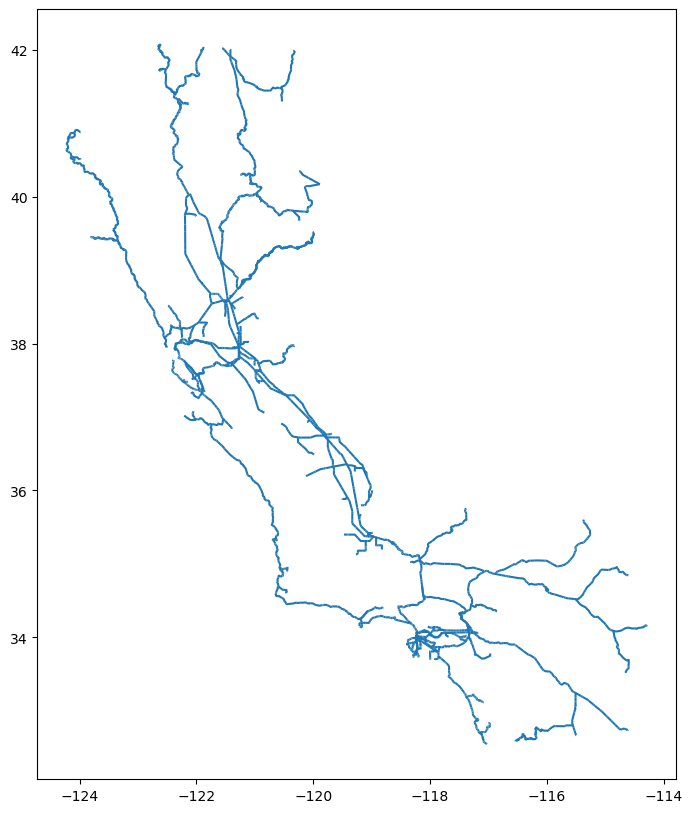

In [9]:
railsub.plot(figsize=(10,10))

In [10]:
gdf = gpd.read_file('data/CES4 Final Shapefile.shp',
                   dtype= {
        'Tract':str,
    }, crs = "EPSG:4326")

In [11]:
gdf_kern = gdf.loc[gdf['County'] == 'Kern'] #subsets data to just include Kern County
gdf_kern.sample()


Tract    ZIP County    ApproxLoc  TotPop19    CIscore   CIscoreP  \
1436  6.029003e+09  93309   Kern  Bakersfield      4050  21.399745  40.885023   

         Ozone     OzoneP      PM2_5    PM2_5_P  DieselPM  DieselPM_P  \
1436  0.064647  93.627878  15.380732  99.265713  0.111392   40.696951   

      Pesticide  PesticideP    Tox_Rel  Tox_Rel_P     Traffic  TrafficP  \
1436        0.0         0.0  236.72733  37.509377  758.798607   41.1125   

        DrinkWat  DrinkWatP       Lead    Lead_P  Cleanup  CleanupP  GWThreat  \
1436  528.969401  63.232172  16.081105  8.506616      0.0       0.0       0.0   

      GWThreatP  HazWaste  HazWasteP  ImpWatBod  ImpWatBodP  SolWaste  \
1436        0.0      0.05   7.346128        0.0         0.0       0.0   

      SolWasteP   PollBurd  PolBurdSc   PolBurdP  Asthma    AsthmaP  \
1436        0.0  32.485676   3.966495  22.887368   81.79  86.453141   

      LowBirtWt   LowBirWP  Cardiovas  CardiovasP  Educatn    EducatP  \
1436       4.28  33.115217      17.62    79.15005     11.4  46.507213   

      Ling_Isol  Ling_IsolP  Poverty   PovertyP  Unempl    UnemplP  HousBurd  \
1436        2.3   18.107998     28.8  51.947236     4.7  40.603852      13.7   

      HousBurdP    PopChar  PopCharSc   PopCharP  Child_10  Pop_10_64  \
1436  31.736375  52.010002   5.395128  53.441755   12.0494     74.716   

      Elderly65  Hispanic    White  AfricanAm  NativeAm  OtherMult  \
1436    13.2346   37.8272  51.7531     6.6667       0.0     1.7037   

       Shape_Leng    Shape_Area    AAPI  \
1436  5798.727745  1.741108e+06  2.0493   

                                               geometry  
1436  POLYGON ((83436.591 -298440.727, 83426.953 -29...

In [12]:
gdf_kern.dtypes

Tract          float64
ZIP              int64
County          object
ApproxLoc       object
TotPop19         int64
                ...   
OtherMult      float64
Shape_Leng     float64
Shape_Area     float64
AAPI           float64
geometry      geometry
Length: 67, dtype: object

In [13]:
gdf_kern['Tract'] = gdf_kern['Tract'].astype(np.str)
gdf_kern.dtypes

/tmp/ipykernel_1015/3760355188.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gdf_kern['Tract'] = gdf_kern['Tract'].astype(np.str)
/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Tract           object
ZIP              int64
County          object
ApproxLoc       object
TotPop19         int64
                ...   
OtherMult      float64
Shape_Leng     float64
Shape_Area     float64
AAPI           float64
geometry      geometry
Length: 67, dtype: object

In [14]:
gdf_kern.sample()

Tract    ZIP County        ApproxLoc  TotPop19    CIscore  \
1487  6029005508.0  93505   Kern  California City      4414  24.720392   

       CIscoreP     Ozone    OzoneP     PM2_5  PM2_5_P  DieselPM  DieselPM_P  \
1487  48.171962  0.062365  88.69944  6.555168  5.20224  0.001358    0.510268   

      Pesticide  PesticideP     Tox_Rel  Tox_Rel_P     Traffic  TrafficP  \
1487        0.0         0.0  349.966001  44.636159  122.095036    1.6375   

        DrinkWat  DrinkWatP       Lead     Lead_P  Cleanup  CleanupP  \
1487  599.615002  68.614962  38.236703  34.593573      0.0       0.0   

      GWThreat  GWThreatP  HazWaste  HazWasteP  ImpWatBod  ImpWatBodP  \
1487       0.0        0.0       0.0        0.0        0.0         0.0   

      SolWaste  SolWasteP  PollBurd  PolBurdSc  PolBurdP  Asthma    AsthmaP  \
1487       3.0  63.665521  24.56888   2.999855  8.002489   92.66  90.391326   

      LowBirtWt   LowBirWP  Cardiovas  CardiovasP  Educatn    EducatP  \
1487       9.35  99.076212      15.46   69.105184     23.2  70.222728   

      Ling_Isol  Ling_IsolP  Poverty   PovertyP  Unempl   UnemplP  HousBurd  \
1487        4.5   34.646096     52.3  84.535176    21.7  99.51848      23.1   

      HousBurdP    PopChar  PopCharSc   PopCharP  Child_10  Pop_10_64  \
1487  74.524715  79.440173   8.240528  92.019667   19.5514    67.2406   

      Elderly65  Hispanic    White  AfricanAm  NativeAm  OtherMult  \
1487     13.208   24.5356  38.6951    30.1767    0.2719      5.188   

        Shape_Leng    Shape_Area    AAPI  \
1487  89242.528592  1.842069e+08  1.1328   

                                               geometry  
1487  POLYGON ((186168.076 -310919.973, 186209.819 -...

In [15]:
gdf_kern['Tract'] = gdf_kern['Tract'].str.zfill(11)
gdf_kern.sample()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Tract    ZIP County ApproxLoc  TotPop19    CIscore   CIscoreP  \
1551  6029000300.0  93308   Kern   Oildale      5322  44.094594  81.001009   

         Ozone     OzoneP     PM2_5    PM2_5_P  DieselPM  DieselPM_P  \
1551  0.064647  93.627878  15.47743  99.415059  0.053474   19.527069   

      Pesticide  PesticideP    Tox_Rel  Tox_Rel_P     Traffic  TrafficP  \
1551        0.0         0.0  32.843534  14.978745  592.596938     27.85   

       DrinkWat  DrinkWatP       Lead     Lead_P  Cleanup   CleanupP  \
1551  694.33176  77.419758  75.875819  85.582861     13.9  72.881672   

      GWThreat  GWThreatP  HazWaste  HazWasteP  ImpWatBod  ImpWatBodP  \
1551       9.0   43.84858      0.33  53.951026        0.0         0.0   

      SolWaste  SolWasteP   PollBurd  PolBurdSc   PolBurdP  Asthma    AsthmaP  \
1551       0.0        0.0  46.245533    5.64657  60.273802   75.37  82.352941   

      LowBirtWt   LowBirWP  Cardiovas  CardiovasP  Educatn   EducatP  \
1551       5.65  67.924044      20.48   88.995513     27.1  76.42369   

      Ling_Isol  Ling_IsolP  Poverty   PovertyP  Unempl    UnemplP  HousBurd  \
1551        0.0         0.0     66.3  95.678392    13.4  94.937533      28.1   

      HousBurdP    PopChar  PopCharSc   PopCharP  Child_10  Pop_10_64  \
1551  86.983523  75.281064   7.809093  86.976803   20.3307    70.4622   

      Elderly65  Hispanic    White  AfricanAm  NativeAm  OtherMult  \
1551     9.2071    29.162  59.2446        0.0    0.0939    10.2029   

       Shape_Leng    Shape_Area    AAPI  \
1551  7827.806454  1.519610e+06  1.2965   

                                               geometry  
1551  POLYGON ((89565.333 -288597.347, 89573.649 -28...

In [16]:
gdf_kern = gdf_kern.to_crs("EPSG:4326")

<AxesSubplot: >

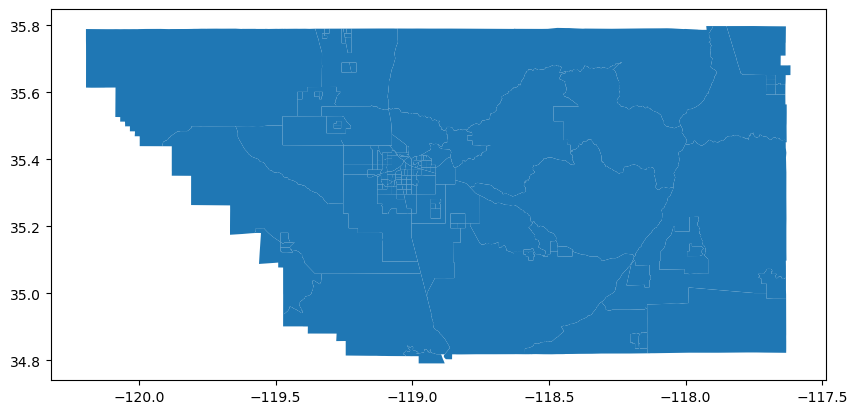

In [17]:
gdf_kern.plot(figsize=(10,10))

In [18]:
#subsetting data further by column 
#'Tract','TotPop19', 'PesticideP','Tox_Rel_P', 'DrinkWat', 
                #'DrinkWatP', 'Lead_P', 'CleanupP', 'GWThreatP', 
                #    'HazWasteP', 'ImpWatBod', 'ImpWatBodP', 'SolWasteP', 
                 #     'PolBurdSc', 'PolBurdP', 'Asthma', 
                  #   'AsthmaP', 'LowBirWP','CardiovasP',
       #  'Poverty','Hispanic', 'White', 'AfricanAm',
        #             'NativeAm', 'OtherMult',
gdf_ksub = gdf_kern[['TotPop19', 'GWThreatP', 'DrinkWatP', 'PolBurdSc', 'Tract', 'Shape_Leng', 'Shape_Area', 'geometry']]
gdf_ksub.sample(1)

TotPop19  GWThreatP  DrinkWatP  PolBurdSc         Tract    Shape_Leng  \
1544     12184  10.642537  97.189959    4.96361  6029003809.0  25827.517205   

        Shape_Area                                           geometry  
1544  2.869992e+07  POLYGON ((-119.25220 35.35440, -119.25209 35.3...

<AxesSubplot: >

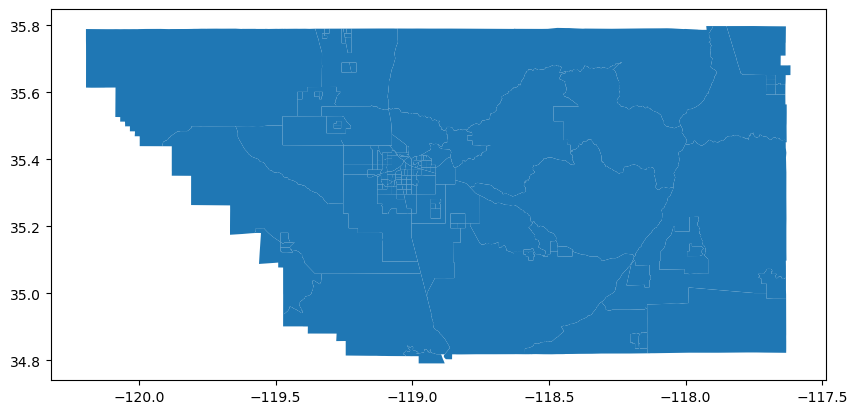

In [19]:
gdf_ksub.plot(figsize = (10,10))

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

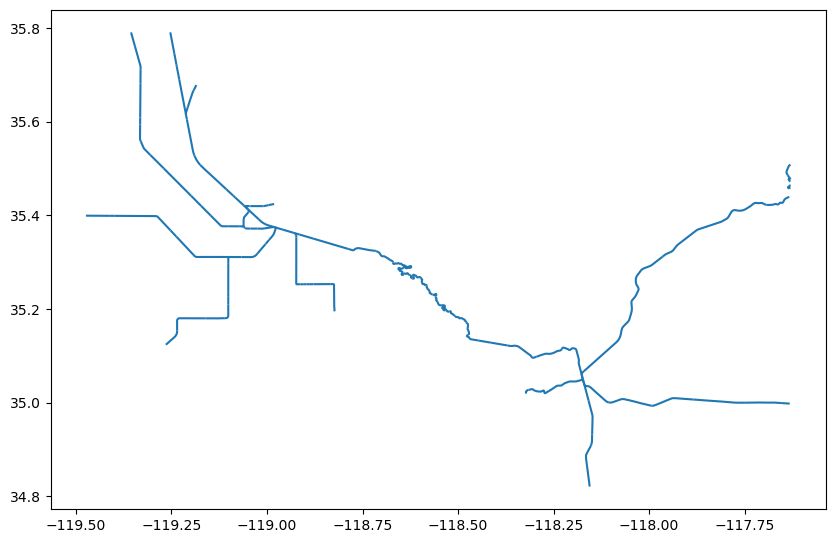

In [20]:
points_clip = gpd.clip(railsub, gdf_ksub)
points_clip.plot(figsize=(10,10))

In [21]:
points_clip = points_clip.to_crs("EPSG:4326") 

/opt/conda/lib/python3.10/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


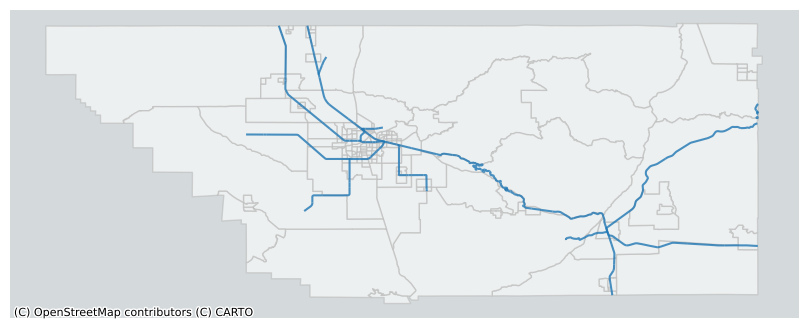

In [22]:
#not sure why it is so stretched even after trying to project to same meracator projections
fig,ax = plt.subplots(figsize=(12,4))

# background census tracts to see the outlines
points_clip.plot(ax=ax,legend=True,alpha=0.8)
gdf_ksub.plot(ax=ax,alpha=0.6,edgecolor='#bbb',facecolor='white')

# census tracts colored by count

ax.axis('off')
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron)

In [23]:
points_clip.sample(20)

FREIGHT_OP                 SUBDIVISIO    SHAPE_LENG  SHAPE_Length  \
1750    UP,BNSF                     Mojave   2988.359468      0.032482   
1777         UP  Oak Creek Industrial Lead  15285.358217      0.161153   
1717    UP,BNSF                     Mojave   7924.939576      0.083694   
1466    UP,SJVR                     Fresno   3545.665089      0.035961   
146     BNSF,UP                     Mojave  17864.963536      0.194080   
1039       SJVR                     Sunset   3759.940060      0.035233   
701        SJVR               Buttonwillow   3645.000871      0.035082   
32         BNSF                Bakersfield   3222.908607      0.029013   
1043        TRC                  Main Line  21039.719870      0.221516   
694        SJVR               Buttonwillow  16791.937080      0.178358   
482   BNSF,SJVR                     Mojave    959.812203      0.010562   
2384       SJVR                North Joint   1367.444704      0.012919   
1461    UP,SJVR                     Fresno   8491.798871      0.086106   
1749    UP,BNSF                     Mojave   2053.403553      0.022323   
23         BNSF                Bakersfield   2599.846251      0.028641   
27         BNSF                Bakersfield   9163.221738      0.092228   
2408         UP                  Lone Pine   5395.471490      0.054904   
1697    UP,BNSF                     Mojave   6511.298520      0.068455   
955        SJVR                   Oil City   1224.477960      0.013413   
1700    UP,BNSF                     Mojave   1720.014485      0.018071   

                                               geometry STATUS  
1750  MULTILINESTRING ((-118.92697 35.36164, -118.92...      1  
1777  LINESTRING (-118.17613 35.05831, -118.17602 35...      1  
1717  LINESTRING (-118.37089 35.12190, -118.36640 35...      1  
1466  MULTILINESTRING ((-119.05024 35.41303, -119.05...      1  
146   LINESTRING (-117.63226 34.99776, -117.64614 34...      1  
1039  LINESTRING (-119.10124 35.20903, -119.10125 35...      1  
701   MULTILINESTRING ((-118.99455 35.34713, -118.99...      1  
32    LINESTRING (-119.33092 35.68138, -119.33067 35...      1  
1043  LINESTRING (-117.63731 35.48540, -117.63888 35...      1  
694   MULTILINESTRING ((-119.23707 35.35435, -119.25...      1  
482   LINESTRING (-119.00772 35.37170, -119.00998 35...      1  
2384  LINESTRING (-119.18474 35.67789, -119.18630 35...      1  
1461  LINESTRING (-119.17465 35.50736, -119.16505 35...      1  
1749  LINESTRING (-118.95856 35.36921, -118.96567 35...      1  
23    LINESTRING (-119.07272 35.37628, -119.07648 35...      1  
27    LINESTRING (-119.19858 35.44151, -119.19891 35...      1  
2408  MULTILINESTRING ((-117.63042 35.47651, -117.63...      1  
1697  MULTILINESTRING ((-118.73033 35.32530, -118.72...      1  
955   LINESTRING (-119.00913 35.41942, -119.00893 35...      1  
1700  LINESTRING (-118.64196 35.27455, -118.64129 35...      1

In [24]:
points_clip['new_column'] = 'Freight' # You'll get a column of all Freight


In [25]:
#do interactive map to overlay TRIs, freight, oil wells, and pipelines where you can turn layers on and off

In [26]:
petroleumpipe = gpd.read_file('Petroleum_Product_Pipelines.geojson')
petroleumpipe.sample(5)

FID                  Opername                   Pipename  Shape_Leng  \
292  293  SHELL MIDSTREAM PARTNERS            Bengal Pipeline    1.370847   
51    52         EXPLORER PIPELINE       Wood River - Hammond    3.902640   
322  323          BUCKEYE PARTNERS            Laurel Pipeline    0.103060   
316  317         EXPLORER PIPELINE  Port Neches - Port Arthur    0.109370   
32    33       COLONIALPIPELINE CO                   Colonial    0.157808   

     SHAPE_Length                                           geometry  
292      1.370847  MULTILINESTRING ((-90.41375 30.00787, -90.4049...  
51       3.902640  MULTILINESTRING ((-90.08837 38.81819, -88.7566...  
322      0.103060  MULTILINESTRING ((-78.45593 40.42140, -78.4283...  
316      0.109370  MULTILINESTRING ((-94.00233 29.89772, -93.9695...  
32       0.157808  MULTILINESTRING ((-78.81594 35.71928, -78.7897...

In [27]:
gaspipe = gpd.read_file('Natural_Gas_Interstate_and_Intrastate_Pipelines.geojson')
gaspipe.sample(5)

FID    TYPEPIPE                   Operator     Status  Shape_Leng  \
20540  20541  Interstate    Enable Gas Transmission  Operating    0.008267   
27991  27992  Interstate            ANR Pipeline Co  Operating    0.065971   
11641  11642  Interstate    Natural Gas PL Co of Am  Operating    0.031020   
6333    6334  Intrastate  El Paso Texas Pipeline Co  Operating    0.149817   
3934    3935  Interstate      Columbia Gas Trans Co  Operating    0.061651   

       SHAPE_Length                                           geometry  
20540      0.008267  MULTILINESTRING ((-92.78507 35.32453, -92.7851...  
27991      0.065971  MULTILINESTRING ((-92.00843 28.98813, -91.9800...  
11641      0.031020  MULTILINESTRING ((-92.80592 29.72778, -92.7947...  
6333       0.149817  MULTILINESTRING ((-99.06877 28.87222, -99.0262...  
3934       0.061651  MULTILINESTRING ((-77.41120 38.98650, -77.3496...

In [28]:
crudepipe = gpd.read_file('Crude_Oil_Pipelines.geojson')
crudepipe.sample(5)

FID                      Opername                Pipename  Shape_Leng  \
228  229                    CHS ENERGY        Jayhawk Pipeline    1.099809   
29    30                 NUSTAR ENERGY  Wichita Falls Pipeline    0.947618   
129  130  PLAINS ALL AMERICAN PIPELINE          Rocky Mountain    1.043340   
57    58                        SUNOCO                   Texas    0.302543   
76    77          PHILLIPS 66 PIPELINE            Tosco 12 & 8    0.288304   

     SHAPE_Length                                           geometry  
228      1.099809  MULTILINESTRING ((-98.31034 38.34118, -98.0949...  
29       0.947618  MULTILINESTRING ((-97.95420 33.86346, -97.5359...  
129      1.043340  MULTILINESTRING ((-106.37224 42.86215, -106.24...  
57       0.302543  MULTILINESTRING ((-100.83406 32.52738, -100.54...  
76       0.288304  MULTILINESTRING ((-119.38100 35.23372, -119.46...

In [29]:
petroclip = gpd.clip(petroleumpipe,gdf_ksub)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [30]:
petroclip.shape

(2, 6)

In [31]:
petroclip['new_column'] = 'Petroleum Products Pipeline' # You'll get a column of all 5s
petroclip.sample()

FID       Opername    Pipename  Shape_Leng  SHAPE_Length  \
179  180  KINDER MORGAN  SFPP_NORTH    3.888583      3.888583   

                                              geometry  \
179  MULTILINESTRING ((-119.25179 35.79044, -119.23...   

                      new_column  
179  Petroleum Products Pipeline

In [32]:
gasclip = gpd.clip(gaspipe,gdf_ksub)


/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [33]:
gasclip['new_column'] = 'Natural Gas Pipeline' # You'll get a column of all 5s
gasclip.sample()

FID    TYPEPIPE            Operator     Status  Shape_Leng  \
10813  10814  Interstate  Mojave Pipeline Co  Operating    0.033044   

       SHAPE_Length                                           geometry  \
10813      0.033044  LINESTRING (-118.85832 35.33738, -118.88471 35...   

                 new_column  
10813  Natural Gas Pipeline

In [34]:
crudeclip = gpd.clip(crudepipe,gdf_ksub)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [35]:
crudeclip['new_column'] = 'Crude Oil Pipeline' # You'll get a column of all 5s
crudeclip.head(10)

FID                      Opername                         Pipename  \
133  134  PLAINS ALL AMERICAN PIPELINE               West Coast Systmem   
118  119         EXXONMOBIL WEST COAST               San Joaquin Valley   
73    74          PHILLIPS 66 PIPELINE  Santa Maria Refinery - Junction   
76    77          PHILLIPS 66 PIPELINE                     Tosco 12 & 8   
75    76          PHILLIPS 66 PIPELINE                Sunset - Junction   
72    73          PHILLIPS 66 PIPELINE       Junction to Rodeo Refinery   

     Shape_Leng  SHAPE_Length  \
133    3.620786      3.620786   
118    2.507605      2.507605   
73     1.669210      1.669210   
76     0.288304      0.288304   
75     0.830120      0.830120   
72     3.428383      3.428383   

                                              geometry          new_column  
133  MULTILINESTRING ((-118.83238 34.81750, -119.00...  Crude Oil Pipeline  
118  MULTILINESTRING ((-119.76721 35.67625, -119.70...  Crude Oil Pipeline  
73   LINESTRING (-120.19385 35.73484, -119.97449 35...  Crude Oil Pipeline  
76   LINESTRING (-119.38100 35.23372, -119.46665 35...  Crude Oil Pipeline  
75   MULTILINESTRING ((-119.39125 35.09812, -119.44...  Crude Oil Pipeline  
72   LINESTRING (-120.03517 35.78881, -119.97449 35...  Crude Oil Pipeline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


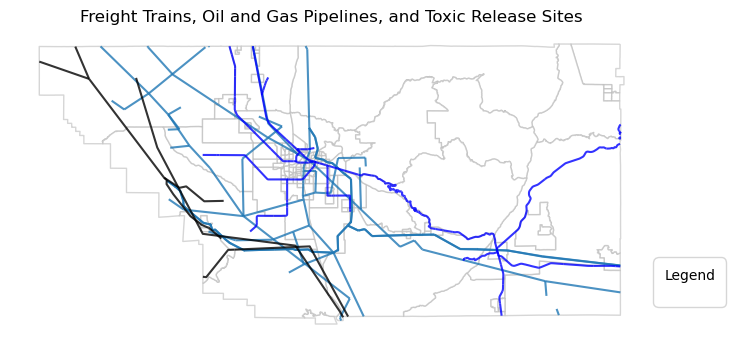

/opt/conda/lib/python3.10/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

In [36]:
fig,ax = plt.subplots(figsize=(12,4))

# background census tracts to see the outlines
petroclip.plot(ax=ax, column='new_column', legend=True, alpha=0.8)
gasclip.plot(ax=ax, legend=True, alpha=0.8)
crudeclip.plot(ax=ax, legend=True, color='black', alpha=0.8)
points_clip.plot(ax=ax,legend=True,color='blue', alpha=0.8)
gdf_ksub.plot(ax=ax,alpha=0.6,edgecolor='#bbb',facecolor='white')

# census tracts colored by count
ax.set(title='Freight Trains, Oil and Gas Pipelines, and Toxic Release Sites')

ax.legend(fontsize=20,
          loc=(1, .1),
          title="Legend")

ax.set_axis_off()
plt.show()
ax.axis('off')
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Positron)

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


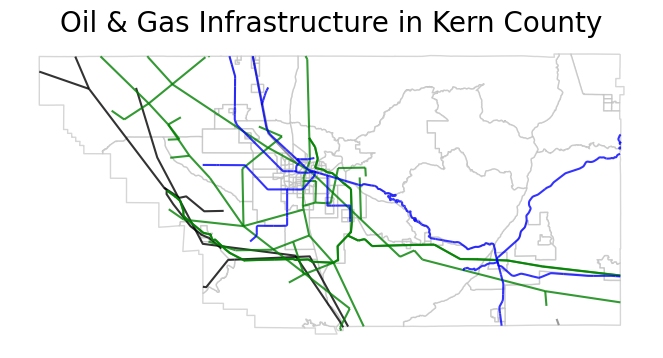

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
crudeclip.plot(ax=ax, column='new_column',  legend=True, color='black', alpha=0.8)
petroclip.plot(ax=ax, column='new_column', legend=True, color ='gray', alpha=0.8)
gasclip.plot(ax=ax, column='new_column', legend=True, color='green', alpha=0.8)
points_clip.plot(ax=ax, column='new_column', legend=True, color='blue', alpha=0.8)
gdf_ksub.plot(ax=ax,alpha=0.6,edgecolor='#bbb',facecolor='white')
ax.axis("off")
ax.set_title("Oil & Gas Infrastructure in Kern County",fontsize=20)
cx.add_basemap
source=cx.providers.CartoDB.Voyager


In [38]:
crudeclip.head()

FID                      Opername                         Pipename  \
133  134  PLAINS ALL AMERICAN PIPELINE               West Coast Systmem   
118  119         EXXONMOBIL WEST COAST               San Joaquin Valley   
73    74          PHILLIPS 66 PIPELINE  Santa Maria Refinery - Junction   
76    77          PHILLIPS 66 PIPELINE                     Tosco 12 & 8   
75    76          PHILLIPS 66 PIPELINE                Sunset - Junction   

     Shape_Leng  SHAPE_Length  \
133    3.620786      3.620786   
118    2.507605      2.507605   
73     1.669210      1.669210   
76     0.288304      0.288304   
75     0.830120      0.830120   

                                              geometry          new_column  
133  MULTILINESTRING ((-118.83238 34.81750, -119.00...  Crude Oil Pipeline  
118  MULTILINESTRING ((-119.76721 35.67625, -119.70...  Crude Oil Pipeline  
73   LINESTRING (-120.19385 35.73484, -119.97449 35...  Crude Oil Pipeline  
76   LINESTRING (-119.38100 35.23372, -119.46665 35...  Crude Oil Pipeline  
75   MULTILINESTRING ((-119.39125 35.09812, -119.44...  Crude Oil Pipeline

In [39]:
crudeclip.dtypes

FID                int64
Opername          object
Pipename          object
Shape_Leng       float64
SHAPE_Length     float64
geometry        geometry
new_column        object
dtype: object

In [40]:
## centering Kern County: 35.4937° N, 118.8597° W
Kern = folium.Map(location=[35.4,-118.8], 
               zoom_start = 8,
               tiles='CartoDB positron', 
               attribution='CartoDB')

Kern


In [41]:
folium.GeoJson(crudeclip).add_to(Kern)
folium.GeoJson(petroclip).add_to(Kern)
folium.GeoJson(gasclip).add_to(Kern)
folium.GeoJson(points_clip).add_to(Kern)
folium.Choropleth(gdf_ksub).add_to(Kern)
folium.LayerControl().add_to(Kern)

Kern

In [42]:
tri = pd.read_csv('TRI_2021_us.csv')
tri.head()

1. YEAR         2. TRIFD     3. FRS ID                   4. FACILITY NAME  \
0     2021  93308SNJQN3542S  1.100000e+11        SAN JOAQUIN REFINING CO INC   
1     2021  93561CLVRS13573  1.100000e+11             LEHIGH CEMENT WEST LLC   
2     2021  93308SNJQN3542S  1.100000e+11        SAN JOAQUIN REFINING CO INC   
3     2021  93501PRDCT11601  1.100000e+11      PRC-DESOTO INTERNATIONAL INC.   
4     2021  93501NNVTV1347P  1.100030e+11  INNOVATIVE COATING TECHNOLOGY INC   

      5. STREET ADDRESS      6. CITY 7. COUNTY 8. ST  9. ZIP  10. BIA  \
0         3500 SHELL ST  BAKERSFIELD      KERN    CA   93308      NaN   
1  13573 TEHACHAPI BLVD    TEHACHAPI      KERN    CA   93561      NaN   
2         3500 SHELL ST  BAKERSFIELD      KERN    CA   93308      NaN   
3       11601 UNITED ST       MOJAVE      KERN    CA   93501      NaN   
4         1347 POOLE ST       MOJAVE      KERN    CA   93501      NaN   

   11. TRIBE  12. LATITUDE  13. LONGITUDE 14. HORIZONTAL DATUM  \
0        NaN     35.395110    -119.046520                NAD83   
1        NaN     35.122790    -118.369304                NAD83   
2        NaN     35.395110    -119.046520                NAD83   
3        NaN     34.988500    -118.150040                NAD83   
4        NaN     35.050444    -118.156344                NAD83   

              15. PARENT CO NAME  16. PARENT CO DB NUM  \
0                            NaN                   NaN   
1  MARTIN MARIETTA MATERIALS INC           809750912.0   
2                            NaN                   NaN   
3             PPG INDUSTRIES INC             1344803.0   
4         BERKSHIRE HATHAWAY INC             9027970.0   

     17. STANDARD PARENT CO NAME 18. FEDERAL FACILITY  \
0                            NaN                   NO   
1  MARTIN MARIETTA MATERIALS INC                   NO   
2                            NaN                   NO   
3             PPG INDUSTRIES INC                   NO   
4         BERKSHIRE HATHAWAY INC                   NO   

   19. INDUSTRY SECTOR CODE          20. INDUSTRY SECTOR  21. PRIMARY SIC  \
0                       324                    Petroleum              NaN   
1                       327  Nonmetallic Mineral Product              NaN   
2                       324                    Petroleum              NaN   
3                       325                    Chemicals              NaN   
4                       332            Fabricated Metals              NaN   

   22. SIC 2  23. SIC 3  24. SIC 4  25. SIC 5  26. SIC 6  27. PRIMARY NAICS  \
0        NaN        NaN        NaN        NaN        NaN             324110   
1        NaN        NaN        NaN        NaN        NaN             327310   
2        NaN        NaN        NaN        NaN        NaN             324110   
3        NaN        NaN        NaN        NaN        NaN             325520   
4        NaN        NaN        NaN        NaN        NaN             332812   

   28. NAICS 2  29. NAICS 3  30. NAICS 4  31. NAICS 5  32. NAICS 6  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3     325510.0          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   33. DOC_CTRL_NUM                                       34. CHEMICAL  \
0      1.321220e+12                               Benzo[g,h,i]perylene   
1      1.321220e+12  Chromium  and Chromium Compounds(except for ch...   
2      1.321220e+12                      Polycyclic aromatic compounds   
3      1.321220e+12  Chromium compounds (except for chromite ore mi...   
4      1.321220e+12                                             Nickel   

  35. ELEMENTAL METAL INCLUDED 36. TRI CHEMICAL/COMPOUND ID   37. CAS#  \
0                           NO                       191242   191-24-2   
1                          YES            

In [43]:
tri = tri[['4. FACILITY NAME', '5. STREET ADDRESS', '6. CITY', '20. INDUSTRY SECTOR','12. LATITUDE',
           '13. LONGITUDE', '15. PARENT CO NAME', '104. TOTAL RELEASES']]
tri.sample(10)

4. FACILITY NAME      5. STREET ADDRESS  \
81                     SAN JOAQUIN REFINING CO INC          3500 SHELL ST   
47        BAKERSFIELD RENEWABLE FUELS LLC - AREA 3         3663 GIBSON ST   
52   BAKERSFIELD RENEWABLE FUELS LLC - AREAS 1 & 2      6451 ROSEDALE HWY   
146                                BAKER PETROLITE         5135 BOYLAN ST   
156  BAKERSFIELD RENEWABLE FUELS LLC - AREAS 1 & 2      6451 ROSEDALE HWY   
84        BAKERSFIELD RENEWABLE FUELS LLC - AREA 3         3663 GIBSON ST   
20                          KERN OIL & REFINING CO  7724 EAST PANAMA LANE   
145                 CLEAN HARBORS BUTTONWILLOW LLC  2500 WEST LOKERN ROAD   
143                     KEMIRA WATER SOLUTIONS INC         18700 HWY 14 N   
154                                  TRICAL MOJAVE         1667 PURDY AVE   

          6. CITY   20. INDUSTRY SECTOR  12. LATITUDE  13. LONGITUDE  \
81    BAKERSFIELD             Petroleum     35.395110    -119.046520   
47    BAKERSFIELD             Petroleum     35.393611    -119.052500   
52    BAKERSFIELD             Petroleum     35.382500    -119.070556   
146   BAKERSFIELD  Chemical Wholesalers     35.400631    -119.052076   
156   BAKERSFIELD             Petroleum     35.382500    -119.070556   
84    BAKERSFIELD             Petroleum     35.393611    -119.052500   
20    BAKERSFIELD             Petroleum     35.295278    -118.921111   
145  BUTTONWILLOW       Hazardous Waste     35.401811    -119.612789   
143        MOJAVE             Chemicals     35.085270    -118.142500   
154        MOJAVE             Chemicals     35.028056    -118.160833   

                   15. PARENT CO NAME  104. TOTAL RELEASES  
81                                NaN               7.5725  
47   GLOBAL CLEAN ENERGY HOLDINGS INC               3.5000  
52   GLOBAL CLEAN ENERGY HOLDINGS INC               1.9540  
146         BAKER HUGHES HOLDINGS LLC               0.0987  
156  GLOBAL CLEAN ENERGY HOLDINGS INC               4.0700  
84   GLOBAL CLEAN ENERGY HOLDINGS INC               0.0037  
20                           CASEY CO             497.6500  
145                 CLEAN HARBORS INC           28252.2528  
143        KEMIRA WATER SOLUTIONS INC               1.3460  
154                        TRICAL INC             390.0000

In [44]:
tri.rename(columns={"12. LATITUDE": "Latitude", "13. LONGITUDE": "Longitude", "20. INDUSTRY SECTOR": "Industry",
                    '104. TOTAL RELEASES':
                   'total_releases'}, inplace=True)
tri.sample()

4. FACILITY NAME      5. STREET ADDRESS       6. CITY  \
173  CLEAN HARBORS BUTTONWILLOW LLC  2500 WEST LOKERN ROAD  BUTTONWILLOW   

            Industry   Latitude   Longitude 15. PARENT CO NAME  total_releases  
173  Hazardous Waste  35.401811 -119.612789  CLEAN HARBORS INC     54174.28935

In [45]:
tri = tri[tri.Industry != 'Nonmetallic Mineral Product']

In [46]:
tri = tri[tri.Industry != 'Food']

In [47]:
tri = tri[tri.Industry != 'Other']

In [48]:
tri = tri[tri.Industry != 'Plastics and Rubber']

In [49]:
tri = tri[tri.Industry != 'Wood Products']

In [50]:
tri = tri[tri.Industry != 'Metal Mining']

In [51]:
tri = tri[tri.Industry != 'Fabricated Metals']
tri.sample(10)

4. FACILITY NAME      5. STREET ADDRESS  \
24                             AMBER CHEMICAL INC.         5201 BOYLAN ST   
116                                     CERTIS USA             720 5TH ST   
144                     KEMIRA WATER SOLUTIONS INC         18700 HWY 14 N   
101                     KEMIRA WATER SOLUTIONS INC         18700 HWY 14 N   
54                             TRICOR REFINING LLC          1134 MANOR ST   
82   BAKERSFIELD RENEWABLE FUELS LLC - AREAS 1 & 2      6451 ROSEDALE HWY   
149                 CLEAN HARBORS BUTTONWILLOW LLC  2500 WEST LOKERN ROAD   
113               CLARIANT CORP - BAKERSFIELD SITE     5501 DISTRICT BLVD   
19                          KERN OIL & REFINING CO  7724 EAST PANAMA LANE   
134                                BAKER PETROLITE         5135 BOYLAN ST   

          6. CITY              Industry   Latitude   Longitude  \
24    BAKERSFIELD  Chemical Wholesalers  35.401250 -119.052070   
116         WASCO             Chemicals  35.596870 -119.333320   
144        MOJAVE             Chemicals  35.085270 -118.142500   
101        MOJAVE             Chemicals  35.085270 -118.142500   
54    BAKERSFIELD             Petroleum  35.418500 -119.011200   
82    BAKERSFIELD             Petroleum  35.382500 -119.070556   
149  BUTTONWILLOW       Hazardous Waste  35.401811 -119.612789   
113   BAKERSFIELD             Chemicals  35.313000 -119.062690   
19    BAKERSFIELD             Petroleum  35.295278 -118.921111   
134   BAKERSFIELD  Chemical Wholesalers  35.400631 -119.052076   

                          15. PARENT CO NAME  total_releases  
24                                       NaN     3360.000000  
116                    MITSUI & CO (USA) INC        0.000000  
144               KEMIRA WATER SOLUTIONS INC       10.000000  
101               KEMIRA WATER SOLUTIONS INC        0.796755  
54   SAN JOAQUIN REFINING CO INC & ERGON INC        0.000751  
82          GLOBAL CLEAN ENERGY HOLDINGS INC       46.000000  
149                        CLEAN HARBORS INC   333736.038600  
113                            CLARIANT CORP        0.000000  
19                                  CASEY CO       46.000000  
134                BAKER HUGHES HOLDINGS LLC      143.820000

In [52]:
# change column names to convert to gdf
tri_gdf = gpd.GeoDataFrame(
    tri, geometry = gpd.points_from_xy(tri.Longitude,tri.Latitude),crs = "EPSG:4326")
tri_gdf.head()

4. FACILITY NAME 5. STREET ADDRESS      6. CITY  \
0               SAN JOAQUIN REFINING CO INC     3500 SHELL ST  BAKERSFIELD   
2               SAN JOAQUIN REFINING CO INC     3500 SHELL ST  BAKERSFIELD   
3             PRC-DESOTO INTERNATIONAL INC.   11601 UNITED ST       MOJAVE   
5  BAKERSFIELD RENEWABLE FUELS LLC - AREA 3    3663 GIBSON ST  BAKERSFIELD   
6             PRC-DESOTO INTERNATIONAL INC.   11601 UNITED ST       MOJAVE   

    Industry   Latitude  Longitude                15. PARENT CO NAME  \
0  Petroleum  35.395110 -119.04652                               NaN   
2  Petroleum  35.395110 -119.04652                               NaN   
3  Chemicals  34.988500 -118.15004                PPG INDUSTRIES INC   
5  Petroleum  35.393611 -119.05250  GLOBAL CLEAN ENERGY HOLDINGS INC   
6  Chemicals  34.988500 -118.15004                PPG INDUSTRIES INC   

   total_releases                     geometry  
0          0.4966  POINT (-119.04652 35.39511)  
2         16.4883  POINT (-119.04652 35.39511)  
3       2707.5800  POINT (-118.15004 34.98850)  
5          0.0100  POINT (-119.05250 35.39361)  
6       4622.8400  POINT (-118.15004 34.98850)

In [53]:
tri_gdf['total_releases'] = tri_gdf['total_releases'].apply(np.int64)
tri_gdf.sample(10)

4. FACILITY NAME      5. STREET ADDRESS  \
144                     KEMIRA WATER SOLUTIONS INC         18700 HWY 14 N   
69                     SAN JOAQUIN REFINING CO INC          3500 SHELL ST   
128                           NUSIL TECHNOLOGY LLC        2343 PEGASUS DR   
26   BAKERSFIELD RENEWABLE FUELS LLC - AREAS 1 & 2      6451 ROSEDALE HWY   
54                             TRICOR REFINING LLC          1134 MANOR ST   
34                  CLEAN HARBORS BUTTONWILLOW LLC  2500 WEST LOKERN ROAD   
77                                   TRICAL MOJAVE         1667 PURDY AVE   
15                CLARIANT CORP - BAKERSFIELD SITE     5501 DISTRICT BLVD   
168  BAKERSFIELD RENEWABLE FUELS LLC - AREAS 1 & 2      6451 ROSEDALE HWY   
116                                     CERTIS USA             720 5TH ST   

          6. CITY         Industry   Latitude   Longitude  \
144        MOJAVE        Chemicals  35.085270 -118.142500   
69    BAKERSFIELD        Petroleum  35.395110 -119.046520   
128   BAKERSFIELD        Chemicals  35.427180 -119.064310   
26    BAKERSFIELD        Petroleum  35.382500 -119.070556   
54    BAKERSFIELD        Petroleum  35.418500 -119.011200   
34   BUTTONWILLOW  Hazardous Waste  35.401811 -119.612789   
77         MOJAVE        Chemicals  35.028056 -118.160833   
15    BAKERSFIELD        Chemicals  35.313000 -119.062690   
168   BAKERSFIELD        Petroleum  35.382500 -119.070556   
116         WASCO        Chemicals  35.596870 -119.333320   

                          15. PARENT CO NAME  total_releases  \
144               KEMIRA WATER SOLUTIONS INC              10   
69                                       NaN              30   
128        AVANTOR PERFORMANCE MATERIALS INC             330   
26          GLOBAL CLEAN ENERGY HOLDINGS INC              38   
54   SAN JOAQUIN REFINING CO INC & ERGON INC               0   
34                         CLEAN HARBORS INC           27433   
77                                TRICAL INC             391   
15                             CLARIANT CORP               0   
168         GLOBAL CLEAN ENERGY HOLDINGS INC             644   
116                    MITSUI & CO (USA) INC               0   

                        geometry  
144  POINT (-118.14250 35.08527)  
69   POINT (-119.04652 35.39511)  
128  POINT (-119.06431 35.42718)  
26   POINT (-119.07056 35.38250)  
54   POINT (-119.01120 35.41850)  
34   POINT (-119.61279 35.40181)  
77   POINT (-118.16083 35.02806)  
15   POINT (-119.06269 35.31300)  
168  POINT (-119.07056 35.38250)  
116  POINT (-119.33332 35.59687)

In [54]:
import pysal.viz.mapclassify as mc

ModuleNotFoundError: No module named 'pysal'

In [55]:
classes = 100

In [56]:
classifier = mc.NaturalBreaks.make(k=classes)


NameError: name 'mc' is not defined

In [57]:
classifications = tri_gdf[['total_releases']].apply(classifier)
classifications.sample(30)

NameError: name 'classifier' is not defined

In [58]:
classifications.rename(columns = {'total_releases':'release_index'}, inplace = True)

NameError: name 'classifications' is not defined

In [59]:
tri_gdf = tri_gdf.join(classifications)

NameError: name 'classifications' is not defined

In [60]:
tri_gdf.head()

4. FACILITY NAME 5. STREET ADDRESS      6. CITY  \
0               SAN JOAQUIN REFINING CO INC     3500 SHELL ST  BAKERSFIELD   
2               SAN JOAQUIN REFINING CO INC     3500 SHELL ST  BAKERSFIELD   
3             PRC-DESOTO INTERNATIONAL INC.   11601 UNITED ST       MOJAVE   
5  BAKERSFIELD RENEWABLE FUELS LLC - AREA 3    3663 GIBSON ST  BAKERSFIELD   
6             PRC-DESOTO INTERNATIONAL INC.   11601 UNITED ST       MOJAVE   

    Industry   Latitude  Longitude                15. PARENT CO NAME  \
0  Petroleum  35.395110 -119.04652                               NaN   
2  Petroleum  35.395110 -119.04652                               NaN   
3  Chemicals  34.988500 -118.15004                PPG INDUSTRIES INC   
5  Petroleum  35.393611 -119.05250  GLOBAL CLEAN ENERGY HOLDINGS INC   
6  Chemicals  34.988500 -118.15004                PPG INDUSTRIES INC   

   total_releases                     geometry  
0               0  POINT (-119.04652 35.39511)  
2              16  POINT (-119.04652 35.39511)  
3            2707  POINT (-118.15004 34.98850)  
5               0  POINT (-119.05250 35.39361)  
6            4622  POINT (-118.15004 34.98850)

In [61]:
gdf_ksub.head()

TotPop19  GWThreatP  DrinkWatP  PolBurdSc         Tract    Shape_Leng  \
1402      5613   0.000000  65.280380   4.624702  6029001802.0  12653.176612   
1403      2923  93.807073  99.625328   7.456522  6029006201.0  68740.430761   
1404      1963  59.887099  97.127513   7.109130  6029003900.0  76205.507941   
1405      3739  39.448780  70.313476   6.680140  6029001700.0   8691.608218   
1406      4300  30.881620  74.847009   6.748344  6029000400.0  11642.813435   

        Shape_Area                                           geometry  
1402  4.995807e+06  POLYGON ((-119.05790 35.36334, -119.05957 35.3...  
1403  8.921771e+07  POLYGON ((-118.87860 35.32540, -118.87848 35.2...  
1404  2.199447e+08  POLYGON ((-119.14280 35.55784, -119.14115 35.5...  
1405  3.686952e+06  POLYGON ((-119.02470 35.38257, -119.02468 35.3...  
1406  3.167584e+06  POLYGON ((-119.05053 35.41280, -119.04995 35.4...

In [62]:
oil = pd.read_csv('data/kern_county_oil.csv')
oil.head(10)

LeaseName            WellDesign WellStatus  \
0                    Southern Pacific  Southern Pacific 11H   Canceled   
1                             Siegfus        Siegfus 31X-22   Canceled   
2                    Southern Pacific   Southern Pacific 5H   Canceled   
3                    Southern Pacific   Southern Pacific 6H   Canceled   
4                    Southern Pacific   Southern Pacific 7H   Canceled   
5  Lease by Stockdale Oil & Gas, Inc.                  UC75   Canceled   
6                             Siegfus         Siegfus USC-2   Canceled   
7                    Southern Pacific  Southern Pacific 10H       Idle   
8                             Siegfus           Siegfus 122       Idle   
9                             Siegfus            Siegfus 1H       Idle   

  WellType WellTypeLa                                   OperatorNa  \
0       OG  Oil & Gas  California Resources Production Corporation   
1       OG  Oil & Gas  California Resources Production Corporation   
2       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
3       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
4       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
5       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
6       OG  Oil & Gas                    Stockdale Oil & Gas, Inc.   
7       OG  Oil & Gas  California Resources Production Corporation   
8       OG  Oil & Gas  California Resources Production Corporation   
9       OG  Oil & Gas  California Resources Production Corporation   

         Place CountyName   Latitude   Longitude GISSource isDirectio  \
0  Kern County       Kern  35.401291 -118.860405  Operator          N   
1  Kern County       Kern  35.397495 -118.855888  Operator          N   
2  Kern County       Kern  35.404583 -118.850471       mip          N   
3  Kern County       Kern  35.403610 -118.849937       mip          N   
4  Kern County       Kern  35.405106 -118.856483       mip          N   
5  Bakersfield       Kern  35.397018 -118.863434       mip          N   
6  Kern County       Kern  35.398052 -118.859688       mip          N   
7  Kern County       Kern  35.402748 -118.857201       GPS          N   
8  Kern County       Kern  35.397060 -118.860001       GPS          N   
9  Kern County       Kern  35.393887 -118.860725       GPS          N   

   WellSymbol  
0  CanceledOG  
1  CanceledOG  
2  CanceledOG  
3  CanceledOG  
4  CanceledOG  
5  CanceledOG  
6  CanceledOG  
7      IdleOG  
8      IdleOG  
9      IdleOG

In [63]:
oil.columns.to_list()

['LeaseName',
 'WellDesign',
 'WellStatus',
 'WellType',
 'WellTypeLa',
 'OperatorNa',
 'Place',
 'CountyName',
 'Latitude',
 'Longitude',
 'GISSource',
 'isDirectio',
 'WellSymbol']

In [64]:
oilsubset = oil[['WellStatus', 'WellTypeLa','Latitude','Longitude']]
oilsubset.head()

WellStatus WellTypeLa   Latitude   Longitude
0   Canceled  Oil & Gas  35.401291 -118.860405
1   Canceled  Oil & Gas  35.397495 -118.855888
2   Canceled  Oil & Gas  35.404583 -118.850471
3   Canceled  Oil & Gas  35.403610 -118.849937
4   Canceled  Oil & Gas  35.405106 -118.856483

In [65]:
oilsubset = oilsubset[oilsubset.WellStatus != 'Canceled']


In [66]:
oilsubset = oilsubset[oilsubset.WellStatus != 'Unknown']


In [67]:
oilsubset = oilsubset.loc[oilsubset['WellTypeLa'] == 'Oil & Gas'] #subsets to just oil and gas data

In [ ]:
Kern1 = folium.Map(location=[35.4,-118.8], 
               zoom_start = 8,
               tiles='CartoDB positron', 
               attribution='CartoDB')
  
style1 = {'fillColor': '#000000', 'color': '#000000', 'weight': 1.5}
style2 = {'fillColor': '#8A8A8A', 'color': '#8A8A8A',  "weight": 1.5}
style3 = {'fillColor': '#B01043', 'color': '#B01043',  "weight": 1.5}
style4 = {'fillColor': '#DE76F5', 'color': '#DE76F5',  "weight": 1.5}


folium.Choropleth(
    geo_data=gdf_ksub,
    name="Census Tracts",
    data=gdf_ksub,
    columns=["Tract", "PolBurdSc"],
    key_on="feature.properties.Tract", #this gets into geojson structure of data ie feature.properties.column name
    #for each tract map the pollution score
    fill_color="YlGn",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Pollution Burden Score",
).add_to(Kern1)
f1 = folium.FeatureGroup(name="Crude Oil Pipeline").add_to(Kern1)
folium.GeoJson(crudeclip, name="Crude Oil Pipeline", style_function=lambda x:style1).add_to(f1)

f2 = folium.FeatureGroup(name="Freight Lines").add_to(Kern1)
folium.GeoJson(points_clip, name="Freight Lines", style_function=lambda x:style2).add_to(f2)

f3 = folium.FeatureGroup(name="Natural Gas Pipeline").add_to(Kern1)
folium.GeoJson(gasclip, name="Natural Gas Pipelines",style_function=lambda x:style3).add_to(f3)

f4 = folium.FeatureGroup(name="Other Petroleum Pipeline").add_to(Kern1)
folium.GeoJson(petroclip, name="Other Petroleum Pipelines", style_function=lambda x:style4).add_to(f4)

f5 = folium.FeatureGroup(name="Toxic Release Facilities").add_to(Kern1)
for i in range(0,len(tri_gdf)): 
   folium.Circle(
    location=[tri_gdf.iloc[i]['Latitude'], tri_gdf.iloc[i]['Longitude']],
     radius=6,
     popup=tri_gdf.iloc[i]['Industry'],# use divide her to bring numbers down
      color='crimson', #create color variable based on industry 
      fill=True,
      fill_color='crimson'
   ).add_to(f5)

f6 = folium.FeatureGroup(name="Oil & Gas Wells").add_to(Kern1)
for i in range(0,len(oilsubset)): 
   folium.Circle(
    location=[oilsubset.iloc[i]['Latitude'], oilsubset.iloc[i]['Longitude']],
     radius=6,
     popup=oilsubset.iloc[i]['WellStatus'],# use divide her to bring numbers down
      color='crimson', #create color variable based on industry 
      fill=True,
      fill_color='crimson'
   ).add_to(f6)

folium.LayerControl().add_to(Kern1)


Kern1


In [63]:
for i in range(0,len(tri_gdf)): 
   folium.Circle(
      location=[tri_gdf.iloc[i]['Latitude'], tri_gdf.iloc[i]['Longitude']],
      radius=(tri_gdf.iloc[i]['4. FACILITY NAME']), # use divide her to bring numbers down
      color='crimson', #create color variable based on industry 
      fill=True,
      fill_color='crimson'
   ).add_to(Kern1)

# Show the map again
#add legend for toxic amounts
#color by industry 
#hover over to show values and company name
Kern1

In [140]:
folium.GeoJson(crudeclip).add_to(Kern)
folium.GeoJson(petroclip).add_to(Kern)
folium.GeoJson(gasclip).add_to(Kern)
folium.GeoJson(points_clip).add_to(Kern)
folium.GeoJson(gdf_ksub).add_to(Kern)
folium.LayerControl().add_to(Kern)

fg1 = folium.FeatureGroup(name = "Crude Oil Pipelines", overlay=False).add_to(Kern)
fg2 = folium.FeatureGroup(name = "Other Petroleum Pipelines", overlay=False).add_to(Kern)
fg3 = folium.FeatureGroup(name = "Natural Gas Pipelines", overlay=False).add_to(Kern)

Kern

In [84]:
group0 = folium.FeatureGroup(name='<span style=\\"color: red;\\">red circles</span>')
for lat, lng in zip(range(500, 520), range(50,70)):
    folium.CircleMarker((lat/10, lng/10), color='red', radius=2).add_to(group0)
group0.add_to(m)

group1 = folium.FeatureGroup(name='<span style=\\"color: blue;\\">blue circles</span>')
for lat, lng in zip(range(500,520), range(70,50,-1)):
    folium.CircleMarker((lat/10, lng/10), color='blue', radius=2).add_to(group1)
group1.add_to(m)

folium.map.LayerControl('topright', collapsed=False).add_to(m)

m

TypeError: GeoJson.__init__() got an unexpected keyword argument 'column'

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon

import folium
from folium import Map
from folium.map import Layer, FeatureGroup,LayerControl,Marker
from folium.plugins import MarkerCluster,FeatureGroupSubGroup,Fullscreen

In [ ]:
## Creating "toggle-able" layers
Kern = folium.Map(location=[35.4,-118.8], 
               zoom_start = 8,
               tiles=None,
               overlay=False)

## FAILING to add a poor man's title, code works but image is not showing up properly
## from folium.plugins import FloatImage
## image_file ='Kern Map Title_small.png'
## FloatImage(image_file, bottom=86, left=10).add_to(Kern)

fg1 = folium.FeatureGroup(name='Density of Oil & Gas Well Locations',overlay=False).add_to(Kern)
fg2 = folium.FeatureGroup(name='Population Count',overlay=False).add_to(Kern)
fg3 = folium.FeatureGroup(name='Incidence of Low Birth Weight',overlay=False).add_to(Kern)
fg4 = folium.FeatureGroup(name='Asthma Rate per 10K residents',overlay=False).add_to(Kern)
fg5 = folium.FeatureGroup(name='Cardiovascular Disease Rate per 10K residents',overlay=False).add_to(Kern)

In [ ]:
#could be really cool to do almost a time series map which shows oil
#wells pop up, then refineries, then pipelines, and then freight to illustrate
#how the infrastructure extends beyond the oil and gas wells themselves
#ask Chris what kind of map that would be 

In [153]:
kern2 = folium.Map(location=[39.77, -86.15], zoom_start=7, tiles="CartoDB positron")

#folium.GeoJson(crudeclip, style_function=None, highlight_function=None, name=None, overlay=True, control=True, show=True, smooth_factor=None, tooltip=None, 
#embed=True, popup=None, zoom_on_click=False, marker=None)

# Provide a style_function that color all states green but Alabama.
style_function = lambda x: {
    "fillColor": "#0000ff"}

folium.GeoJson(crudeclip, style_function=style_function).add_to(kern2)


kern2

ValueError: Cannot render objects with any missing geometries: <folium.map.FeatureGroup object at 0x7fc4846060e0>

In [67]:
Kern2 = folium.Map(location=[35.4,-118.8], 
               zoom_start = 8,
               tiles=None,
               overlay=False)

folium.GeoJson(crudeclip, style_function=lambda x: {
        'color' : x['properties']['color'],
        'weight' : x['properties']['stroke-width'],
        'opacity': 1,
        'fillColor' : x['properties']['fillcolor'],
        }).add_to(Kern2)


lines = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{"color": 
        "#0000ff", "stroke-width": 1},"geometry":{"type":"LineString","coordinates":
     [[-1.64794921875,46.46813299215554],[-0.94482421875,47.724544549099676],[-0.263671875,47.97521412341618]]
    }},{"type":"Feature","properties":{"color": "#00ff00", "stroke-width": 1},"geometry":
    {"type":"LineString","coordinates":[[-0.263671875,47.97521412341618],
    [1.58203125,48.67645370777654],[1.8896484375,48.32703913063476],[2.3291015625,
    48.37084770238366]]}},{"type":"Feature","properties":{"color": "#ff0000", "stroke-width": 
    1},"geometry":{"type":"LineString","coordinates":[[2.3291015625,48.37084770238366],
    [2.548828125,48.60385760823255],[3.01025390625,48.66194284607006],[3.251953125,
    48.42920055556841],[3.5815429687499996,48.531157010976706],[3.779296875,48.32703913063476]]}}]}

style_function = lambda x: {
    'color' : x['properties']['color'],
    'weight' : x['properties']['stroke-width']
}

folium.GeoJson(lines, style_function=style_function).add_to(Kern2)

Kern2

KeyError: 'color'